In [1]:
#import salem 
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Other functions for check
def space_mean(ds):
     return xr.Dataset(dict(ds.mean(dim= ['south_north','west_east'],keep_attrs=True).data_vars), coords=dict(ds.coords))

def time_series(dates, variables, labels,title=None, xlabel=None, ylabel=None):    
    import plotly.graph_objs as go
    
    data=[] #empty list for storing traces.
    
    # create trace for each variable
    for i in range(len(variables)):
            trace = go.Scatter(
            x=dates, 
            y=variables[i],
            name= labels[i],
            mode='markers',
            )
            data.append(trace)
    # set layout of the plot       
    layout = go.Layout(
    xaxis=dict(title= xlabel),
    yaxis=dict(title= ylabel),
    title=title,
    showlegend = True)
    
    # plot
    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [3]:
def map_2D(dataset, var_name, mon,level=0, mask_values=None,
           title=None, cmap = 'OrRd', coastline=True, borders=True,
           pixels=False, save=False, format='pdf', dpi=1000):


    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import numpy as np
    
    
    # ------------------------- DRAW THE MAP --------------------------------
    # draw map.
    ax = plt.subplot(projection=ccrs.PlateCarree())
 
    # draw meridians and parallels.
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}


    # draw coastlines and borders.
    if coastline:
        ax.add_feature(cfeature.COASTLINE, lw=0.5)
    if borders:
        ax.add_feature(cfeature.BORDERS, lw=0.5)

   # ------------------------- GET DATA TO PLOT------------------------------
   
    # get variable from dataset.   
    var = dataset[var_name]
      
    # plot data at desired level.
    long = dataset.lon.values
    lat = dataset.lat.values
    
    if mask_values is None:
        var_values = var[mon,:,:]
    else: 
        var_values= np.ma.masked_where(var[mon,:,:].values < mask_values,
                                       var[mon,:,:].values) 
   

   # -------------------------  PLOT DATA ----------------------------------
    
    #plot type: contourf or pcolormesh.
    if pixels:
        cs = plt.pcolormesh(long, lat,var_values,
            transform=ccrs.PlateCarree(), cmap =cmap)
    else:    
        cs = plt.contourf(long, lat, var_values,
            transform=ccrs.PlateCarree(), cmap=cmap)
    
    # colorbar.
    cbar = plt.colorbar(cs)
    cbar.set_label(var.units)
    
    #title.
    ax.set_title(title)
    
    #save
    if save:
        plt.savefig( save + '.' + format, format=format, dpi=dpi)
    
    plt.show()

In [4]:
# Get new perturbed data and base data. =dir_path + "wrfchemi*"
antropm25 = "/geos/d21/s1878599/EMISSIONS_WRF/anthro_data/EDGAR-HTAP_2010/MOZART_MOSAIC/ALL_2010/EDGAR_HTAP_emi_PM2.5_2010.0.1x0.1.nc"
antropm25c = "/geos/d21/s1878599/EMISSIONS_WRF/anthro_data/EDGAR-HTAP_2010/MOZART_MOSAIC/ALL_2010/no_double_pm/EDGAR_HTAP_emi_PM2.5_2010.0.1x0.1.nc"
antroECc = "/geos/d21/s1878599/EMISSIONS_WRF/anthro_data/EDGAR-HTAP_2010/MOZART_MOSAIC/ALL_2010/no_double_pm/EDGAR_HTAP_emi_BC_2010.0.1x0.1.nc"

#co = salem.open_mf_wrf_dataset(antroCO)
#co = salem.open_mf_wrf_dataset(antroCO)
pm25=xr.open_dataset(antropm25)
pm25c=xr.open_dataset(antropm25c)
ecc=xr.open_dataset(antroECc)

In [5]:
pm25=pm25.where((pm25.lon>60) &(pm25.lon<95) & (pm25.lat>15) & (pm25.lat<40))
pm25c=pm25c.where((pm25c.lon>60) &(pm25c.lon<95) & (pm25c.lat>15) & (pm25c.lat<40))
ecc=ecc.where((ecc.lon>60) &(ecc.lon<95) & (ecc.lat>15) & (ecc.lat<40))

In [76]:
import numpy as np
np.nanmax(pm25c.emis_tot.values)

2.8002987e-09

In [77]:
np.nanmax(pm25.emis_tot.values)

2.8276004e-09

In [78]:
np.nanmax(ecc.emis_tot.values)

6.5123906e-10

In [7]:
pm25c.emis_tot.attrs["units"]=pm25.emis_tot.attrs["units"]

In [5]:
#get only pib data
#shdf= salem.read_shapefile("/exports/csce/datastore/geos/users/s1878599//python_code/gadm_data/PIB/PIB.shp")
#pib_co = co.salem.roi(shape=shdf)

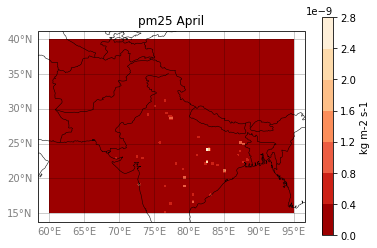

In [8]:
map_2D(pm25c,'emis_tot',3,cmap='OrRd_r',title="pm25 April")

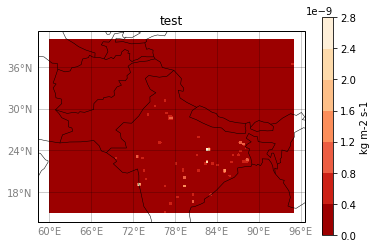

In [73]:
map_2D(pm25,'emis_tot',9,cmap='OrRd_r',title="test")

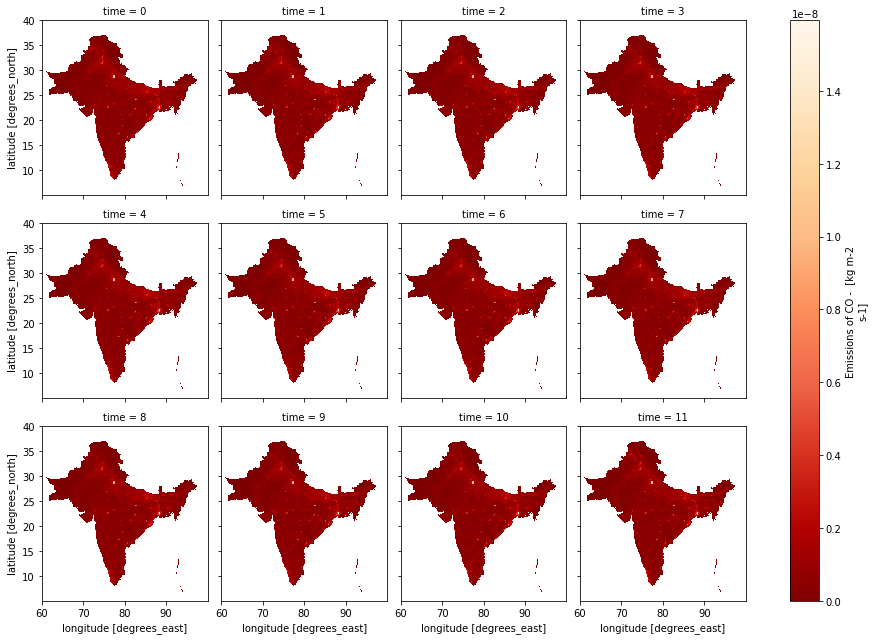

In [29]:
(pib_co_res.sel(lat=slice(5, 40), lon=slice(60,100)).emis_tot.plot.imshow(col='time', col_wrap=4,cmap="OrRd_r"))